<h1>Generación de sobretonos musicales</h1>

|Apellidos|Nombres|Especialidad|Código|
|:--|:--|:--|:--|
|Araujo Calderon|Patrick Willians|Ingeniería física|20220588A|
|Neyra Otoya|Alejandro Oswaldo|Ingeniería física|20220577J|
|Romero Calero|Nelson Samir|Física|20222160I|
|Santa Cruz Basilio|Jesus Diego|Ciencia de la computación|20235005G|

## 1. Resumen
En el presente proyecto, implementaremos un programa el cual genere cinco tonos musicales similares a una guitarra aleatoriamente. Para ello, importaremos librerías que nos ayudarán a desarrollar e implementar el programa, este programa creará archivos `WAV`, reproducirá una melodía aleatoria en la escala pentatónica menor, mostrará un gráfico en el cual que muestra la perdía de energía de la nota tocada y tendrá un modo para tocar las notas en modo piano. Usaremos el código fuente base de Mahesh Venkitachalam para desarrollar nuestro código e iremos implementando y corrigiendo algunos errores de este código base, todo el desarrollo e implementación lo haremos en el lenguaje python 3. 

## 2. Introducción
### 2.1. Presentación del algoritmo de Karplus-Strong 
Para comenzar a desarrollar nuestro código, primero hay que entender como funciona el algoritmo de Karplus-Strong. El algoritmo es un método de síntesis de sonido basado en el modelado físico, que se utiliza principalmente para simular el sonido de una cuerda pulsada o golpeada, por ejemplo, como es el caso de una guitarra o de un piano. La idea básica del algoritmo es eliminar los frecuencias más altas para que el sonido de la notas se escuche más natural. Para eso, pasaremos a las ondas mediante un pasa-bajos que se multiplica por un factor de atenuación y así simule la perdía de energía de las notas musicales.
### 2.2. La escala pentatónica
La escala hace referencia a una serie de pasos o escalones que ascienden o desciende gradualmente. En la música, los escalones son las notas musicales. Cuando usamos notas de distinta afinación que ascienden o descienden de manera organizada y con distancias determinadas entre una y otra, estamos formando una escala.

Para analizar una **escala musical** necesitamos entender un concepto funamental: el **intervalo musical**. El intervalo es la distancia que hay entre una y otra. La medida que usamos para determinar esto es una unidad musical a la que le llamamos **"tono"**. Finalmente, la otra unidad fundamental para medir intervalos es el **"semitono"** que no es más que medio tono.

Para entender mejor este concepto puedesver un piano, ya que es muy útil para poder visualizar las distancias entre las notas. Si mira las teclas, notarás que hay blancas y negras. Debes saber que hay un tono completo entreuna y otra nota cuando hay una tecla de por medio. Otra forma de verlo es que la distancia que hay entre una tecla y otra, sin importar el color, es un semitono. Por ejemplo, podemos ver que entre Do y Re hay una tecla negra, así que su distancia que es 1 tono completo.

La palabra pentatónica, se compone de dos conceptos: "*penta*" que significa cinco, y "*tónica*" que se refiere tono. Si funcionamos estos conceptos obtenemos que la escala pentatónica significa "*la escala de cinco tonos*".Precisamente esta escala se compone de 5 notas distintas y existen varias que cumplen estos requisitos, sin embargo la más utilizada son **la escal pentatónica mayor** y **la escala pentatónica menor**.

Una particularidad esencial de esta escala es que **no tiene semitonos**, como la muchas de las otras escalas.

#### 2.2.2. La escala pentatónica menor
Como en cualquier otra, una escala se convierte en menor al disminuir la tercera y la séptima nota por medio tono (*tercera menor* y *séptima menor*). Pause.

## 3. Objetivos
### 3.1. Objetivos generales
- Crear el archivo `WAV` usando el módulo *wave*.
- Reproducir el archivo `WAV` creado usando el módulo *pygame*.

### 3.2. Objetivos específicos
- Crear el búfer circular usando la clase *deque* en Python.
- Crear las matrices incorporando los módulos *numpy* y *ufuncs*.
- Generar los sobretonos musicales usando *el algoritmo de Karplus-Strong*.
- Generar gráficos usando el módulo matplotlib.

## 4. Implementación y demostración de resultados
En esta sección, nos centraremos en el desarrollo e implementación del código, el cual lo dividiremos en 7 partes, para explicar paso a paso que hace cada línea, para ello comentaremos las lineas, que son necesarias para el entendimiento de esta. Primero, entenderemos las métodos que usaremos de la clase `deque`. Segundo, desarrollaremos un programa que genera un archivo WAV. Tercero, desarrollaremos el algoritmo Karplus-Strong para luego implementarlo en la función principal.
### 4.1. Métodos de la clase deque


In [1]:
#Importamos la clase deque
from collections import deque

#Genere un objeto "d" de la clase deque de 10 elementos de 0 hasta 9
d=deque(range(10))
#Imprime el objeto "d" y la función str() convierte a el objeto "d" a un string
print(str(d))

deque([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


In [2]:
#Añade al elemento -1 al final de la lista
d.append(-1)
print(str(d))

deque([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, -1])


In [3]:
#el método popleft devuelve y elimina el elemento que se encuentra al inicio de la lista
value=d.popleft()
print(str(d))
print(str(value))

deque([1, 2, 3, 4, 5, 6, 7, 8, 9, -1])
0


### 4.2. Creando un archivo WAV

In [4]:
# Importamos los módulos necesarios
import numpy as np
import wave, math
import matplotlib.pyplot as plt

#Crea la variable Sample rate y asigna el valor de 44100
sRate = 44100
#Crea la variable nSample y asigna el valor de sRate multiplicado por 5
nSamples = sRate * 5

# Crea un ndarray de tamaño de nSamples de elementos que va desde 0 hasta nSample-1,
# y todos los elementos son divididos entre el float sRate
x = np.arange(nSamples)/float(sRate)
#Crea un ndarray "vals" en función a los elementos del ndarray "x"
vals = np.sin(2.0*math.pi*220*x)

# luego de generar la amplitud crearemos el archivo, los valores de la onda sinusoidal calculados en el rango [-1,1] se
# escalan a valores de 16 bits y se convierten a una cadena de caracteres.
data = np.array(vals*32767, 'int16').tobytes()
#Abre el archivo sine.wav usando el método wave.open() (en el caso de que no sea haya creado, crea un archivo del tipo wav) 
file = wave.open('sine22O.wav', 'wb')

# Agregamos los parametros necesarios para configurar el archivo WAV.
file.setparams((1, 2, sRate, nSamples, 'NONE', 'uncompressed'))

# Escribimos el archivo WAV usando los parametros anteriormente agregados:
file.writeframes(data)

# Cerramos el archivo para volcar las cambios
file.close()

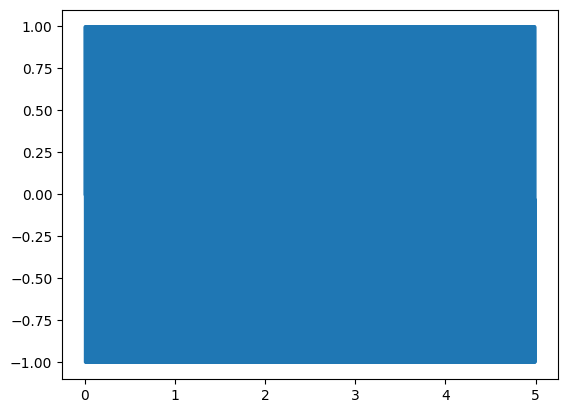

In [5]:
#Crea un gráfico en el cual los valores de las abscisas es el ndarray "x"
# y los valores de las ordenadas es el ndarray "vals"
plt.plot(x,vals)
plt.show()


### 4.3. Implementación del algoritmo de Karplus-Strong

In [8]:
# Genera una nota según el parametro de frecuencia ingresado
def generateNote(freq):
    #freq=220
    nSamples = 44100
    sampleRate = 44100
    N = int(sampleRate/freq)
    # initialize ring buffer
    buf = deque([random.random() - 0.5 for i in range(N)])
    # init sample buffer
    samples = np.array([0]*nSamples, 'float32')
    for i in range(nSamples):
        samples[i] = buf[0]
        avg = 0.995*0.5*(buf[0] + buf[1])
        buf.append(avg)
        buf.popleft() 
    # plot of flag set 
        if gShowPlot:
            if i % 1000 == 0:
                plt.axline.set_ydata(buf)
                plt.draw()
    # samples to 16-bit to string
    # max value is 32767 for 16-bit
        samples = np.array(samples * 32767, 'int16')
        print(samples.tostring())
    return samples.tostring()

## Conclusiones

## Verificación

## Referencias